In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [16]:
x = np.arange(-80, 81, 0.5)
y = x **2 +x + 3

In [17]:
x.shape , y.shape

((322,), (322,))

In [18]:
x_train , x_test, y_train , y_test = train_test_split(x, y , test_size =0.2)

In [19]:
x_train.shape, x_test.shape

((257,), (65,))

### Model

In [27]:
model = keras.Sequential()
model.add(keras.layers.Dense(units = 256, activation = 'relu', input_shape = [1]))
model.add(keras.layers.Dense(units = 256, activation = 'relu'))
model.add(keras.layers.Dense(units = 256, activation = 'relu'))
model.add(keras.layers.Dense(units = 256, activation = 'relu'))
model.add(keras.layers.Dense(units = 1))


In [28]:
optimizer = keras.optimizers.RMSprop(learning_rate= 0.0001 )
loss  = keras.losses.mean_absolute_error
metric = tf.metrics.RootMeanSquaredError()


model.compile(optimizer = optimizer, loss = loss, metrics= metric)

In [31]:
early_stop = keras.callbacks.EarlyStopping(patience= 300, monitor = 'val_loss', restore_best_weights=True)

In [33]:
hist = model.fit(x_train, y_train, batch_size = 128, epochs = 1000, callbacks=[early_stop], validation_data=(x_test, y_test))

Epoch 1/1000
3/3 [==============================] - 0s 43ms/step - loss: 553.1105 - root_mean_squared_error: 679.4463 - val_loss: 609.7404 - val_root_mean_squared_error: 730.6710
Epoch 2/1000
3/3 [==============================] - 0s 20ms/step - loss: 552.7846 - root_mean_squared_error: 679.7662 - val_loss: 617.3826 - val_root_mean_squared_error: 724.2844
Epoch 3/1000
3/3 [==============================] - 0s 33ms/step - loss: 552.6511 - root_mean_squared_error: 666.5418 - val_loss: 622.6329 - val_root_mean_squared_error: 714.0610
Epoch 4/1000
3/3 [==============================] - 0s 22ms/step - loss: 551.0895 - root_mean_squared_error: 652.1091 - val_loss: 621.8322 - val_root_mean_squared_error: 713.6791
Epoch 5/1000
3/3 [==============================] - 0s 22ms/step - loss: 550.8230 - root_mean_squared_error: 652.2432 - val_loss: 617.1896 - val_root_mean_squared_error: 719.7313
Epoch 6/1000
3/3 [==============================] - 0s 21ms/step - loss: 550.8306 - root_mean_squared_err

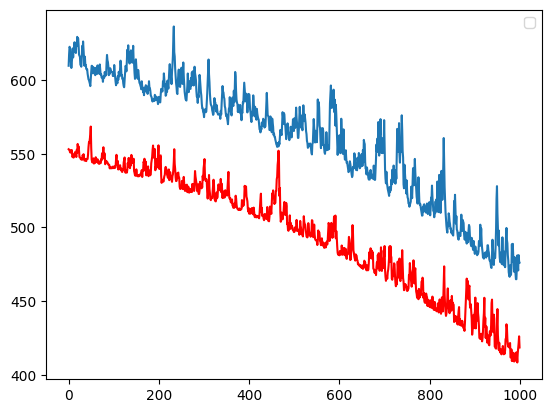

In [36]:
plt.plot(hist.history['val_loss'],)
plt.plot(hist.history['loss'],color ='r')
plt.legend()
plt.show()